<a href="https://colab.research.google.com/github/TasneemAhmed/Uber-New-York-Analysis/blob/main/Uber_New_York_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Collect Data for Analysis**

In [ ]:
!pip install chart_studio

In [ ]:
!pip install folium

In [1]:
from folium.plugins import HeatMap

In [2]:
import folium

In [3]:
import os
import csv

In [4]:
# Libraries for handling numeric computation and dataframes
import pandas as pd
import numpy as np
# Libraries for statistical plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
#os.listdir(): is a built-in Python method that lists the files in the current working directory
absolute_path = r"/content/gdrive/MyDrive/uber_pickups_in_NewYork_city"
os.chdir(absolute_path)

files = os.listdir(absolute_path)
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-janjune-15.csv']

In [ ]:
#create blank dataframe
final = pd.DataFrame()
#concat all files into one dataframe(concat like Union in SQL)
for file in files:
  file_link = absolute_path + "/"  + file
  with open(file_link) as file:
    print(file)
    csv_reader = csv.DictReader(file)
    df = pd.DataFrame(data=csv_reader)
    final = pd.concat([df,final])

<_io.TextIOWrapper name='/content/gdrive/MyDrive/uber_pickups_in_NewYork_city/uber-raw-data-apr14.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/MyDrive/uber_pickups_in_NewYork_city/uber-raw-data-aug14.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/MyDrive/uber_pickups_in_NewYork_city/uber-raw-data-jun14.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/MyDrive/uber_pickups_in_NewYork_city/uber-raw-data-may14.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/MyDrive/uber_pickups_in_NewYork_city/uber-raw-data-sep14.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/MyDrive/uber_pickups_in_NewYork_city/uber-raw-data-jul14.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/gdrive/MyDrive/uber_pickups_in_NewYork_city/uber-raw-data-janjune-15.csv' mode='r' encoding='UTF-8'>


In [ ]:
final.shape

# **2. Data preperation for Analysis**

In [ ]:
df = final.copy()
df

In [ ]:
#check data types for dataframe
df.dtypes

In [ ]:
#convert 'Date/Time/ col from object into datetime datatype
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.dtypes

In [ ]:
#extract month, day_name, day, hour, and minute from 'Date/Time' 
df['month'] = df['Date/Time'].dt.month
df['weekday'] = df['Date/Time'].dt.day_name()
df['day'] = df['Date/Time'].dt.day
df['hour'] = df['Date/Time'].dt.hour
df['minute'] = df['Date/Time'].dt.minute

df
#df.dtypes

# **3.1 Analysis of Journey by Weekdays**

In [ ]:
df['weekday'].value_counts()

In [ ]:
df['weekday'].value_counts().index

In [ ]:
px.bar(x = df['weekday'].value_counts().index,
       y = df['weekday'].value_counts())

# **3.2 Analysis of Journey by Month**

In [ ]:
#get unique months (April, May, June, September, Nonember, July)
df['month'].unique()

In [ ]:
for index,month in enumerate(df['month'].unique()):
  print(index, month)

In [ ]:
#we want for every month, every hour make histogram chart
plt.figure(figsize=(40,20))
for index,month in enumerate(df['month'].unique()):
  plt.subplot(3,2,index+1)
  df[df['month'] == month]['hour'].hist()

# **3.3 Which month has the maximum rides**

In [ ]:
df.groupby('month').count()

In [ ]:
#count values grouping by month
df.groupby('month')['hour'].count()

In [ ]:
df.groupby('month')['hour'].count().index

In [ ]:
trace_1 = go.Bar(
    x = df.groupby('month')['hour'].count().index,
    y = df.groupby('month')['hour'].count()
)

In [ ]:
iplot([trace_1])

# **3.4 Analysis of Journeies for each day in Month**

In [ ]:
df['day'].value_counts()

In [ ]:
#use seaborn viz
sns.distplot(df['day'])

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(df['day'], bins=30, rwidth= .8, range=(.5,30.5))
plt.xlabel('Day of month')
plt.ylabel('Total journies')
plt.title('Journies by Month Day')

# **3.5 Total rides for each month**

In [ ]:
df.groupby('month')['day'].count()

In [ ]:
plt.figure(figsize=(20,8))
for index,month in enumerate(df['month'].unique(), 1):
  plt.subplot(3,2,index)
  df_out = df[df['month']==month]
  plt.hist(df_out['day'])
  plt.xlabel('Days of Month')
  plt.ylabel('Total Rides')

# **3.6 Analyse Russh in Hour / latitude**

In [ ]:
plt.figure(figsize=(20,8))
xs = sns.pointplot(x='hour', y='Lat', data=df)
xs.set_title('Hours of each Weekday Vs Latitude of Passangers')

# **3.7 Show group by (base numbers ) for  each month (group by month)**

In [ ]:
base = df.groupby(['Base', 'month'])['Date/Time'].count().reset_index()
base

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='Date/Time', hue='Base', data=base)

# **3.8 Cross Analysis using Heatmap**


1.   Heatmap by hour & weekday
2.   Heatmap by hour & day
3.   Heatmap by month & day
4.   Heatmap by month & weekday





In [ ]:
def count_rows(rows):
  return len(rows)

In [ ]:
grouping_data  = df.groupby(['month', 'weekday']).apply(count_rows)

In [ ]:
pivoit = grouping_data.unstack()
pivoit

In [ ]:
sns.heatmap(pivoit)

In [ ]:
def heatmap(col1, col2):
  plt.figure(figsize=(10,6))
  grouping_data = df.groupby([col1, col2])['Date/Time'].count()
  pivioting_data = grouping_data.unstack()
  return sns.heatmap(pivioting_data)

In [ ]:
# Heatmap by month & weeekday
heatmap('month', 'weekday')

In [ ]:
# Heatmap by weekday & hour
heatmap('weekday', 'hour')

In [ ]:
#Heatmap by hour & weekday
heatmap('hour', 'weekday')

# **3.9 Analysis of location data ponit (show densithy through langtitude & latitude toghether)**

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Lon'], df['Lat'], 'r+', ms = 0.5)
#plt.xlim(-74.2, -73.7)
#plt.ylim(40.6, 41)
#plt.xlabel('Longatitude')
#plt.ylabel('Latitude')

# **3.10 Perform spatial analysis using Heatmap to show the Rush**

In [ ]:
df_out = df[df['weekday'] == 'Monday']
df_out

In [ ]:
rush = df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index()
#change columns names
rush.columns = ['Latitude','Longtitude','Number of Trips'] 
rush

In [ ]:
basemap = folium.Map()
basemap

In [ ]:
HeatMap(rush).add_to(basemap)
basemap

**Automate the solution**

In [ ]:
#1. filter in specific day, 2. group by 'lat' & 'lon' & count values, 3. Create map
def plot(day):
  basemap = folium.Map()
  df_out = df[df['weekday'] == day]
  weekday_rush = df_out.groupby(['Lat','Lon'])['weekday'].count().reset_index()
  HeatMap(weekday_rush).add_to(basemap)

In [ ]:
plot('Saturday')

# **4. Preprocess & Analysis 'uber-raw-data-janjune-15.csv' file**

In [33]:
#1. Collect Data
uber_janune_15_file = pd.read_csv(absolute_path + "/"  + 'uber-raw-data-janjune-15.csv')
uber_janune_15_file.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [9]:
uber_df = uber_janune_15_file.copy()
uber_df

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45


In [10]:
uber_df.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [12]:
#Delete rows with "Pickup_date" col = value '201'
uber_df = uber_df.loc[uber_df["Pickup_date"] != '201']

In [13]:
# 2. Preprocess data (convert pickup_date object into datetime)
uber_df['Pickup_date'] = pd.to_datetime(uber_df['Pickup_date'], format='%Y-%m-%d %H:%M:%S')
uber_df.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [14]:
uber_df['year'] = uber_df['Pickup_date'].dt.year
uber_df['month'] = uber_df['Pickup_date'].dt.month
uber_df['weekday'] = uber_df['Pickup_date'].dt.day_name()
uber_df['day'] = uber_df['Pickup_date'].dt.day
uber_df['hour'] = uber_df['Pickup_date'].dt.hour
uber_df['minute'] = uber_df['Pickup_date'].dt.minute

In [15]:
uber_df

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,year,month,weekday,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,2015,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,2015,5,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,2015,5,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,2015,5,Sunday,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,2015,5,Sunday,17,9,47
...,...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,2015,5,Friday,8,15,43
14270475,B02765,2015-05-08 15:43:00,B02765,263,2015,5,Friday,8,15,43
14270476,B02765,2015-05-08 15:43:00,B02765,90,2015,5,Friday,8,15,43
14270477,B02765,2015-05-08 15:44:00,B01899,45,2015,5,Friday,8,15,44


# **4.3 Analysis uber rides by month**

In [16]:
uber_df['month'].value_counts()

6    2816895
5    2695553
4    2280837
2    2263620
3    2259773
1    1953801
Name: month, dtype: int64

In [17]:
px.bar(x= uber_df['month'].value_counts().index,
       y= uber_df['month'].value_counts(),
       title= 'Rides through Months')

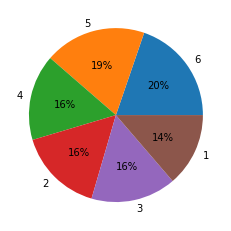

In [18]:
data = uber_df['month'].value_counts()
labels = uber_df['month'].value_counts().index

#create pie chart
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

# **4.4 Analysis rush through hours**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



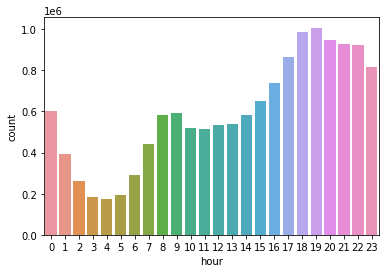

In [21]:
sns.countplot(uber_df['hour'])

# **4.5 Analysis rush in each weekday & its hours**

In [28]:
day_summary = uber_df.groupby(['weekday', 'hour'])['Pickup_date'].count().reset_index()
#rename columns of day_summary dataframe
day_summary.columns = ['weekday', 'hour', 'counts']
day_summary

,weekday,hour,counts
0,Friday,0,85939
1,Friday,1,46616
2,Friday,2,28102
3,Friday,3,19518
4,Friday,4,23575
...,...,...,...
163,Wednesday,19,143751
164,Wednesday,20,136003
165,Wednesday,21,133993
166,Wednesday,22,127026


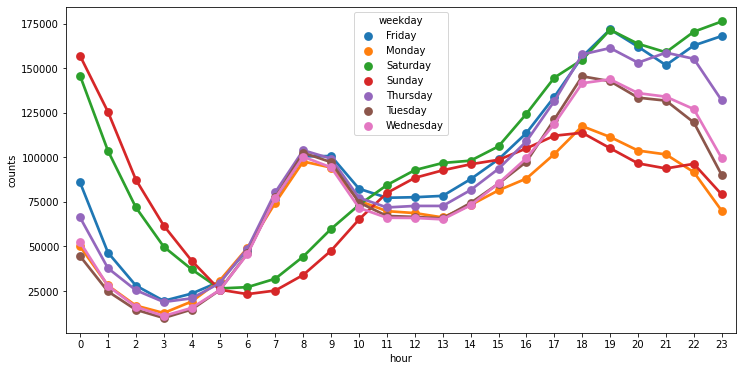

In [29]:
plt.figure(figsize=(12,6))
sns.pointplot(x='hour', y='counts', hue='weekday', data=day_summary)

# **5. Preprocess & Analysis 'Uber-Jan-Feb-FOIL.csv' file**

In [34]:
df_foil = pd.read_csv(absolute_path + "/" + 'Uber-Jan-Feb-FOIL.csv')
df_foil.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


**5.1 Analysis base number VS active_vehicles**

In [39]:
df_foil['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

In [38]:
px.bar(x= df_foil['dispatching_base_number'],
       y= df_foil['active_vehicles']
)

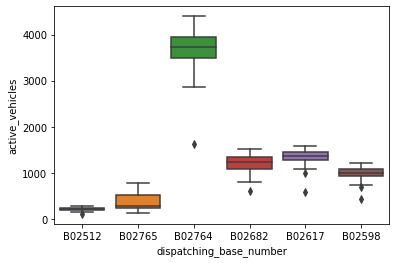

In [40]:
sns.boxplot(x='dispatching_base_number', y= 'active_vehicles', data= df_foil)

**5.2 Analysis base number VS trips**

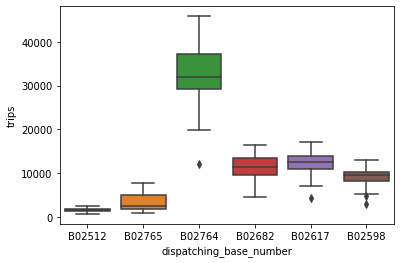

In [41]:
sns.boxplot(x= 'dispatching_base_number', y= 'trips', data= df_foil)

In [47]:
df_foil['Trips/Active Vehicles'] = df_foil['trips'] / df_foil['active_vehicles']
df_foil

,dispatching_base_number,date,active_vehicles,trips,Trips/Active Vehicles
0,B02512,1/1/2015,190,1132,5.957895
1,B02765,1/1/2015,225,1765,7.844444
2,B02764,1/1/2015,3427,29421,8.585060
3,B02682,1/1/2015,945,7679,8.125926
4,B02617,1/1/2015,1228,9537,7.766287
...,...,...,...,...,...
349,B02764,2/28/2015,3952,39812,10.073887
350,B02617,2/28/2015,1372,14022,10.220117
351,B02682,2/28/2015,1386,14472,10.441558
352,B02512,2/28/2015,230,1803,7.839130


**5.3 Show Demand & Supply (Trips/Active Vehicles) based on date for each Base number**

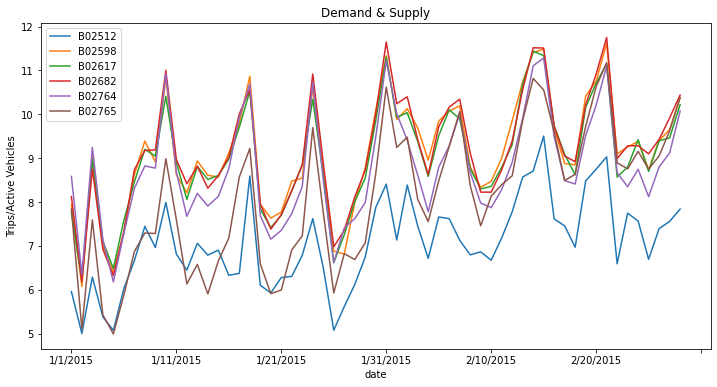

In [53]:
plt.figure(figsize=(12,6))
df_foil.set_index('date').groupby(['dispatching_base_number'])['Trips/Active Vehicles'].plot()
plt.ylabel('Trips/Active Vehicles')
plt.title('Demand & Supply')
plt.legend()